# Calories Burnt Prediction

In [69]:
#importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#converting the csv files into pandas dataframe 

data1=pd.read_csv('calories.csv')
data2=pd.read_csv('exercise.csv')

In [3]:
data1

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
data2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [5]:
data1.isna().sum()

User_ID     0
Calories    0
dtype: int64

In [6]:
data2.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [7]:
#checking if the order of the User_IDs are same

data1['User_ID'].equals(data2['User_ID'])

True

In [8]:
#merging the two dataframes

df=pd.concat([data2, data1['Calories']], axis=1)

In [9]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [10]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
df.shape

(15000, 9)

In [72]:
df.value_counts("Gender")

Gender
female    7553
male      7447
dtype: int64

In [73]:
#ignoring the warnings 

import warnings
warnings.filterwarnings('ignore')

In [74]:
#Finding the correlations for Calories

numberData=df.select_dtypes(include=['int64','float64'])
correlation=numberData.corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

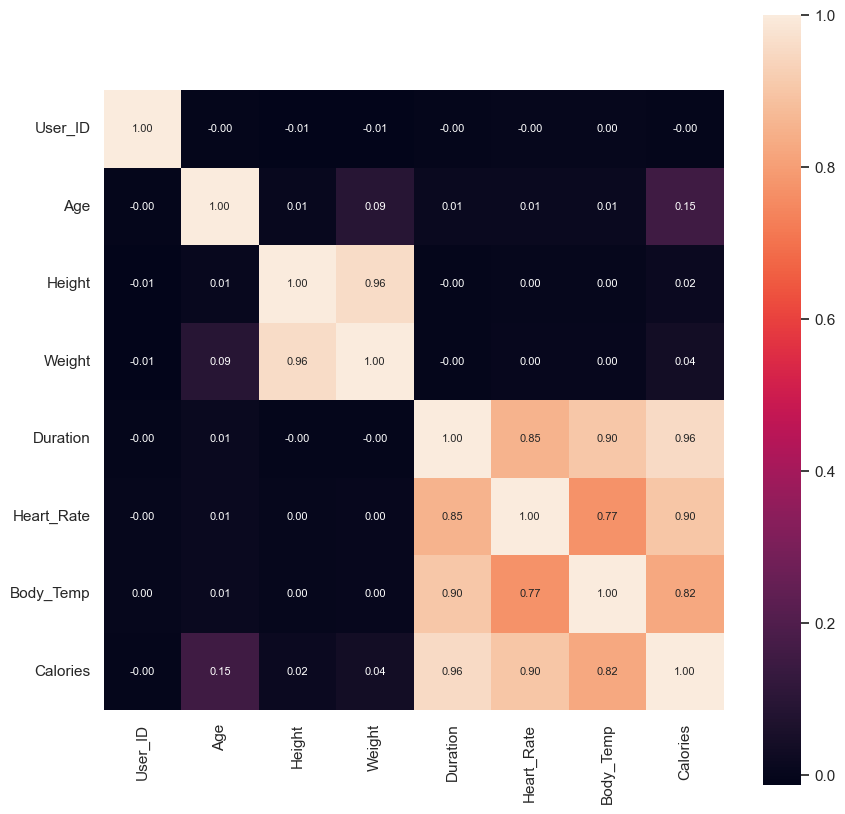

In [75]:
#Plotting the correlation matrix 

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,fmt='.2f', square=True, annot=True, annot_kws={'size':8})

In [76]:
#Splitting the data

X=df.drop(columns=['User_ID','Calories'],axis=1)
Y=df['Calories']

In [77]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4
14996,female,27,165.0,65.0,6.0,85.0,39.2
14997,female,43,159.0,58.0,16.0,90.0,40.1
14998,male,78,193.0,97.0,2.0,84.0,38.3


In [78]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [79]:
#Creating Gender column into numeric column

X.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [80]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [81]:
#Train-Test Splitting

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)

In [82]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


In [83]:
#Creating a function to check multiple ML models

def PredictModel(modelType):
    model=modelType.fit(x_train,y_train)
    
    score=model.score(x_train,y_train)
    print("Score is: ",score)
    print("\n")
    
    y_prediction=model.predict(x_test)
    print("Predictions are: \n",y_prediction) 
    print("True Values were: \n",pd.array(y_test))
    print("\n")
    
    r2score=metrics.r2_score(y_test,y_prediction)
    print('r2 score:',r2score)
    MAE=metrics.mean_absolute_error(y_test,y_prediction)
    print('Mean Absolute Error:',MAE)
    MSE=metrics.mean_squared_error(y_test,y_prediction)
    print('Mean Squared Error:',MSE)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',RMSE)
    
    sns.distplot(y_test-y_prediction)

Linear Regression Algorithm

Score is:  0.9671531775974046


Predictions are: 
 [  3.24958722  38.38723017  89.49112117 ...   8.67928525 -16.01133937
  86.32187437]
True Values were: 
 <PandasArray>
[  3.0,  45.0,  85.0, 216.0,  28.0,   7.0, 104.0,  64.0, 138.0,  79.0,
 ...
 135.0, 166.0,  16.0,   9.0, 234.0,  58.0,  31.0,  18.0,   1.0,  88.0]
Length: 3000, dtype: float64


r2 score: 0.9673459744685879
Mean Absolute Error: 8.393342950304486
Mean Squared Error: 124.22213102484032
Root Mean Squared Error: 11.145498240313904


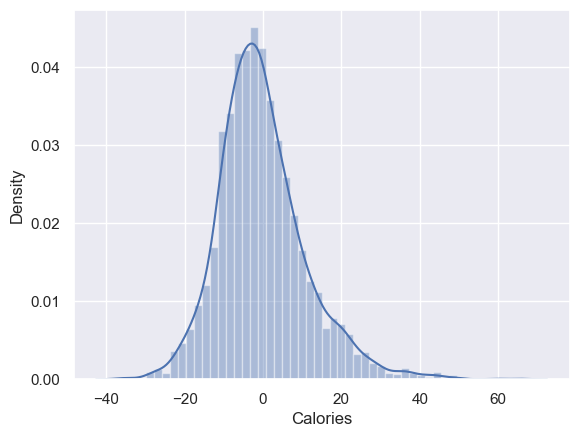

In [84]:
linearpredict=PredictModel(LinearRegression())

Decision Tree Algorithm

Score is:  1.0


Predictions are: 
 [ 3. 48. 86. ... 18.  1. 88.]
True Values were: 
 <PandasArray>
[  3.0,  45.0,  85.0, 216.0,  28.0,   7.0, 104.0,  64.0, 138.0,  79.0,
 ...
 135.0, 166.0,  16.0,   9.0, 234.0,  58.0,  31.0,  18.0,   1.0,  88.0]
Length: 3000, dtype: float64


r2 score: 0.9926424993861109
Mean Absolute Error: 3.3953333333333333
Mean Squared Error: 27.989333333333335
Root Mean Squared Error: 5.290494620858558


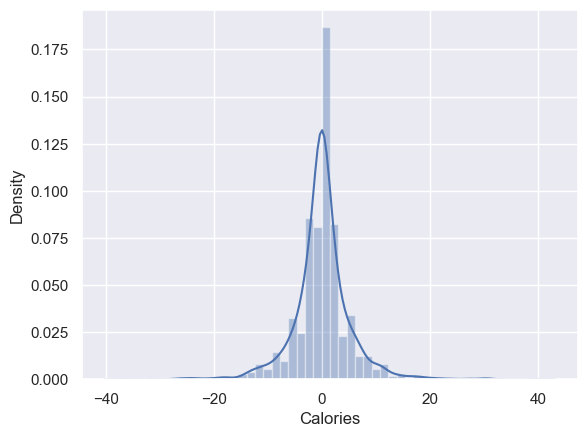

In [85]:
decisiontreepredict=PredictModel(DecisionTreeRegressor())

Random Forest Algorithm

Score is:  0.9997015590292455


Predictions are: 
 [ 3.34 43.93 84.37 ... 16.53  2.04 87.78]
True Values were: 
 <PandasArray>
[  3.0,  45.0,  85.0, 216.0,  28.0,   7.0, 104.0,  64.0, 138.0,  79.0,
 ...
 135.0, 166.0,  16.0,   9.0, 234.0,  58.0,  31.0,  18.0,   1.0,  88.0]
Length: 3000, dtype: float64


r2 score: 0.9981044982133791
Mean Absolute Error: 1.6461199999999998
Mean Squared Error: 7.210849733333334
Root Mean Squared Error: 2.685302540372934


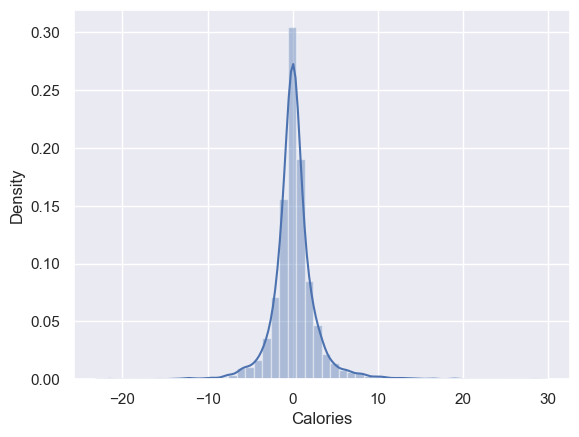

In [86]:
randomforestpredict=PredictModel(RandomForestRegressor())

XGB Regressor Algorithm

Score is:  0.999540807510127


Predictions are: 
 [ 3.270806  42.943573  87.28585   ... 16.699863  -1.3009728 88.261635 ]
True Values were: 
 <PandasArray>
[  3.0,  45.0,  85.0, 216.0,  28.0,   7.0, 104.0,  64.0, 138.0,  79.0,
 ...
 135.0, 166.0,  16.0,   9.0, 234.0,  58.0,  31.0,  18.0,   1.0,  88.0]
Length: 3000, dtype: float64


r2 score: 0.998735366795985
Mean Absolute Error: 1.5453841526210308
Mean Squared Error: 4.810905516577013
Root Mean Squared Error: 2.1933776502410645


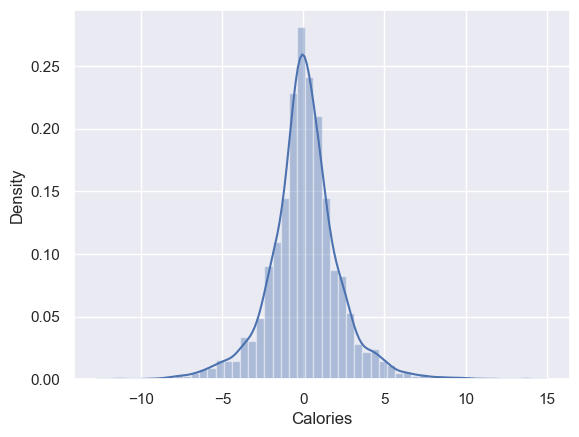

In [87]:
xgbpredict=PredictModel(XGBRegressor())